In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl
import datetime 

C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages

In [2]:
trump_thall_df = pd.read_csv("Trump_Town_Hall.csv")
trump_thall_df.head(5)

C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.316890e+18,1.316890e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,1.275420e+18,jojo_trumpsucks,Trump Murders 225K ++/ Vote Biden/Harris-2020 BLM,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
1,1.316890e+18,1.316800e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,1.934668e+07,chrisweiler,chris weiler,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '137466464', 'username': 'felicias...",NaN,NaN,NaN,NaN
2,1.316890e+18,1.316890e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,7.336990e+17,micheala_tweets,China is asshoe,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
3,1.316890e+18,1.316890e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,1.252400e+18,dinobravo24,𝘋𝘦𝘢𝘯,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '17068891', 'username': 'NicoleSGr...",NaN,NaN,NaN,NaN
4,1.316890e+18,1.316890e+18,2020-10-15 19:59:58 Eastern Daylight Time,10/15/2020,19:59:58,-400,1.921182e+07,gvb7862,GVB,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN


In [3]:
trump_thall_df.dtypes

id                 float64
conversation_id    float64
created_at          object
date                object
time                object
timezone             int64
user_id            float64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet            float64
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [4]:
trump_thall_df.isnull().sum(axis = 0)

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                   63
place              713086
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet            713141
quote_url          666479
video                   0
thumbnail          602240
near               713141
geo                713141
source             713141
user_rt_id         713141
user_rt            713141
retweet_id         713141
reply_to                0
retweet_date       713141
translate          713141
trans_src          713141
trans_dest         713141
dtype: int64

In [5]:
#columns to drop 
columns = ['place', 'retweet', 'quote_url','near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
trump_thall_df.drop(columns, axis = 1, inplace = True)
trump_thall_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to
0,1.316890e+18,1.316890e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,1.275420e+18,jojo_trumpsucks,Trump Murders 225K ++/ Vote Biden/Harris-2020 BLM,Confirmed: Donald Trump knew about Rudy Giulia...,...,[],0,4,10,[],[],https://twitter.com/JOJO_TrumpSucks/status/131...,0,NaN,"{'user_id': None, 'username': None}"
1,1.316890e+18,1.316800e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,1.934668e+07,chrisweiler,chris weiler,@feliciasonmez @realDonaldTrump is that sleazy...,...,[],0,0,0,['bidenharristosaveamerica'],[],https://twitter.com/chrisweiler/status/1316891...,0,NaN,"{'user_id': '137466464', 'username': 'felicias..."
2,1.316890e+18,1.316890e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,7.336990e+17,micheala_tweets,China is asshoe,#CROOKEDJOE is only running to cover up the cr...,...,[],0,0,1,['crookedjoe'],[],https://twitter.com/micheala_tweets/status/131...,0,NaN,"{'user_id': None, 'username': None}"
3,1.316890e+18,1.316890e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,1.252400e+18,dinobravo24,𝘋𝘦𝘢𝘯,@NicoleSGrigg @realDonaldTrump Too late,...,[],0,0,2,[],[],https://twitter.com/dinobravo24/status/1316891...,0,NaN,"{'user_id': '17068891', 'username': 'NicoleSGr..."
4,1.316890e+18,1.316890e+18,2020-10-15 19:59:58 Eastern Daylight Time,10/15/2020,19:59:58,-400,1.921182e+07,gvb7862,GVB,scary that @FBI had laptop since Dec 2019 feel...,...,[],0,1,1,"['usa', 'election2020']",[],https://twitter.com/gvb7862/status/13168915998...,0,NaN,"{'user_id': None, 'username': None}"


In [6]:
trump_thall_df.username.nunique()

298606

In [7]:
tweet_time = trump_thall_df.time.value_counts()
tweet_time

17:00:02    46
17:30:00    42
17:22:06    42
17:00:08    42
17:04:36    41
            ..
5:42:50      1
3:03:14      1
4:53:17      1
3:52:09      1
1:26:49      1
Name: time, Length: 70642, dtype: int64

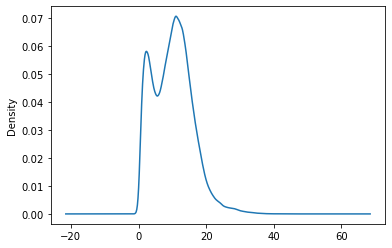

In [8]:
# Visualize the value counts
tweet_time.plot.density()

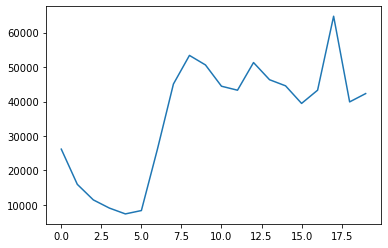

In [9]:
#Tweets per Hour
trump_thall_df["hour"]=pd.to_datetime(trump_thall_df['time'], format='%H:%M:%S').dt.hour
hours=trump_thall_df.hour.value_counts()
hours.sort_index(ascending=True, inplace=True)
hours.plot()

In [10]:
def cleaned_tweet (row):
    clean_tweet=row["tweet"]
    s = []
    for word in clean_tweet.split():
        if '@' not in word and 'https' not in word and '#' not in word:
            s.append(word)
    return (' ').join(s)

In [11]:
def label_na (row):
    if len(row['cleaned_tweet'].strip())==0: 
        return np.NaN
    else:
        return row["cleaned_tweet"]

In [12]:
trump_thall_df["cleaned_tweet"]=trump_thall_df.apply (lambda row: cleaned_tweet(row), axis=1)

In [13]:
trump_thall_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1.316890e+18,1.316890e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,1.275420e+18,jojo_trumpsucks,Trump Murders 225K ++/ Vote Biden/Harris-2020 BLM,Confirmed: Donald Trump knew about Rudy Giulia...,...,4,10,[],[],https://twitter.com/JOJO_TrumpSucks/status/131...,0,NaN,"{'user_id': None, 'username': None}",19,Confirmed: Donald Trump knew about Rudy Giulia...
1,1.316890e+18,1.316800e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,1.934668e+07,chrisweiler,chris weiler,@feliciasonmez @realDonaldTrump is that sleazy...,...,0,0,['bidenharristosaveamerica'],[],https://twitter.com/chrisweiler/status/1316891...,0,NaN,"{'user_id': '137466464', 'username': 'felicias...",19,is that sleazy salesman willing to do and say ...
2,1.316890e+18,1.316890e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,7.336990e+17,micheala_tweets,China is asshoe,#CROOKEDJOE is only running to cover up the cr...,...,0,1,['crookedjoe'],[],https://twitter.com/micheala_tweets/status/131...,0,NaN,"{'user_id': None, 'username': None}",19,is only running to cover up the crimes of the ...
3,1.316890e+18,1.316890e+18,2020-10-15 19:59:59 Eastern Daylight Time,10/15/2020,19:59:59,-400,1.252400e+18,dinobravo24,𝘋𝘦𝘢𝘯,@NicoleSGrigg @realDonaldTrump Too late,...,0,2,[],[],https://twitter.com/dinobravo24/status/1316891...,0,NaN,"{'user_id': '17068891', 'username': 'NicoleSGr...",19,Too late
4,1.316890e+18,1.316890e+18,2020-10-15 19:59:58 Eastern Daylight Time,10/15/2020,19:59:58,-400,1.921182e+07,gvb7862,GVB,scary that @FBI had laptop since Dec 2019 feel...,...,1,1,"['usa', 'election2020']",[],https://twitter.com/gvb7862/status/13168915998...,0,NaN,"{'user_id': None, 'username': None}",19,scary that had laptop since Dec 2019 feels lik...


In [15]:
trump_thall_df.to_csv('super_clean_trump_thall_df.csv', index = False)